         date       open       high        low      close
0  1990-01-02  17.240000  17.240000  17.240000  17.240000
1  1990-01-03  18.190001  18.190001  18.190001  18.190001
2  1990-01-04  19.219999  19.219999  19.219999  19.219999
3  1990-01-05  20.110001  20.110001  20.110001  20.110001
4  1990-01-08  20.260000  20.260000  20.260000  20.260000
              open         high          low        close
count  8482.000000  8482.000000  8482.000000  8482.000000
mean     19.714974    20.519452    18.957621    19.625163
std       8.007784     8.466067     7.496305     7.931281
min       9.010000     9.310000     8.560000     9.140000
25%      13.940000    14.580000    13.420000    13.910000
50%      17.830000    18.520000    17.270000    17.820000
75%      23.170000    24.037501    22.379999    23.049999
max      82.690002    89.529999    72.760002    82.690002
Columns with missing values:
Series([], dtype: int64)


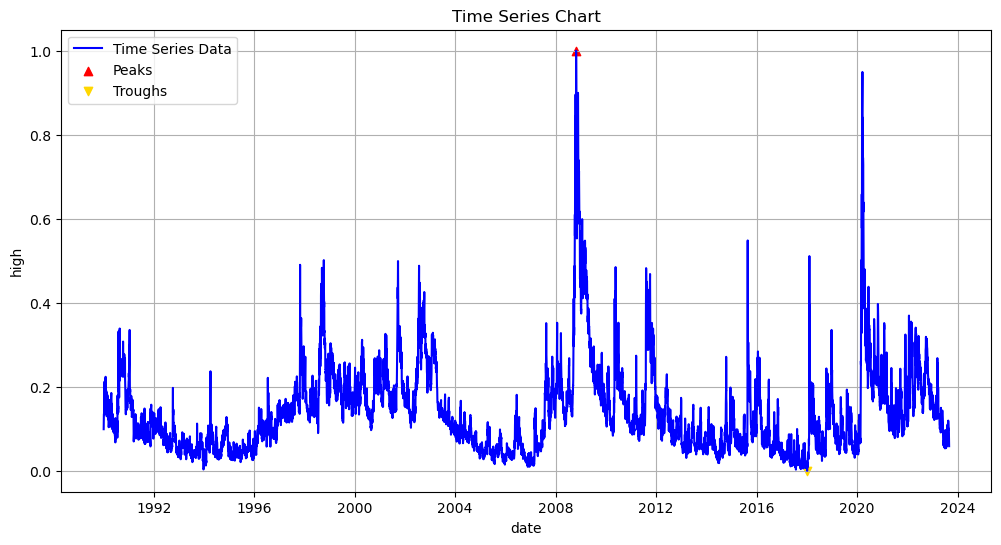

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


# Replace 'data.csv' with the path to your CSV file
file_path = 'vix_daily.csv'



# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

print(df.head())

# Check for missing values
missing_values = df.isnull().sum()

# Get descriptive statistics of numeric columns to assess their scale
descriptive_stats = df.describe()

print(descriptive_stats)

# Display columns with missing values and their counts
print("Columns with missing values:")
print(missing_values[missing_values > 0])

# Impute missing values if necessary
# For example, you can fill missing values in a numeric column with the mean:
# df['column_name'].fillna(df['column_name'].mean(), inplace=True)

# Normalize the data (assuming you want to normalize numeric columns)
numeric_columns = df.select_dtypes(include=['number']).columns

# You can choose different normalization methods depending on your requirements
# Here, we'll use min-max scaling to normalize between 0 and 1
for col in numeric_columns:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    
    

df['date'] = pd.to_datetime(df['date'])

# Set the 'Date' column as the index for time series plotting
df.set_index('date', inplace=True)

# Plot the time series data for OPEN
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['high'], label='Time Series Data', color='blue')
plt.xlabel('date')
plt.ylabel('high')
plt.title('Time Series Chart')
plt.grid(True)

# Highlight peaks and troughs (you can customize this part)
peaks = df[df['high'] == df['high'].max()]
troughs = df[df['high'] == df['high'].min()]

plt.scatter(peaks.index, peaks['high'], color='red', marker='^', label='Peaks')
plt.scatter(troughs.index, troughs['high'], color='gold', marker='v', label='Troughs')

plt.legend()
plt.show()







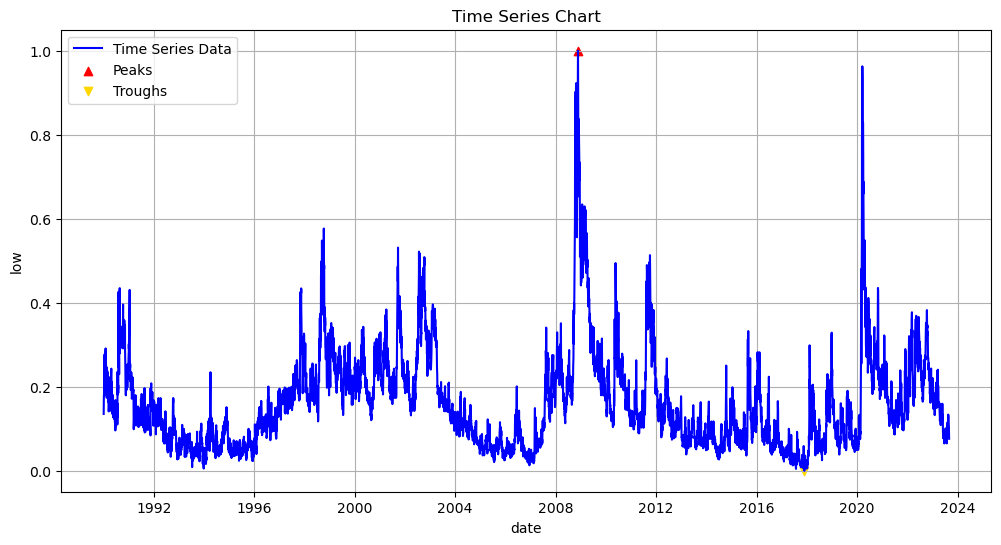

In [5]:
# Plot the time series data for CLOSE
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
plt.plot(df.index, df['low'], label='Time Series Data', color='blue')
plt.xlabel('date')
plt.ylabel('low')
plt.title('Time Series Chart')
plt.grid(True)

# Highlight peaks and troughs (you can customize this part)
peaks = df[df['low'] == df['low'].max()]
troughs = df[df['low'] == df['low'].min()]

plt.scatter(peaks.index, peaks['low'], color='red', marker='^', label='Peaks')
plt.scatter(troughs.index, troughs['low'], color='gold', marker='v', label='Troughs')

plt.legend()
plt.show()

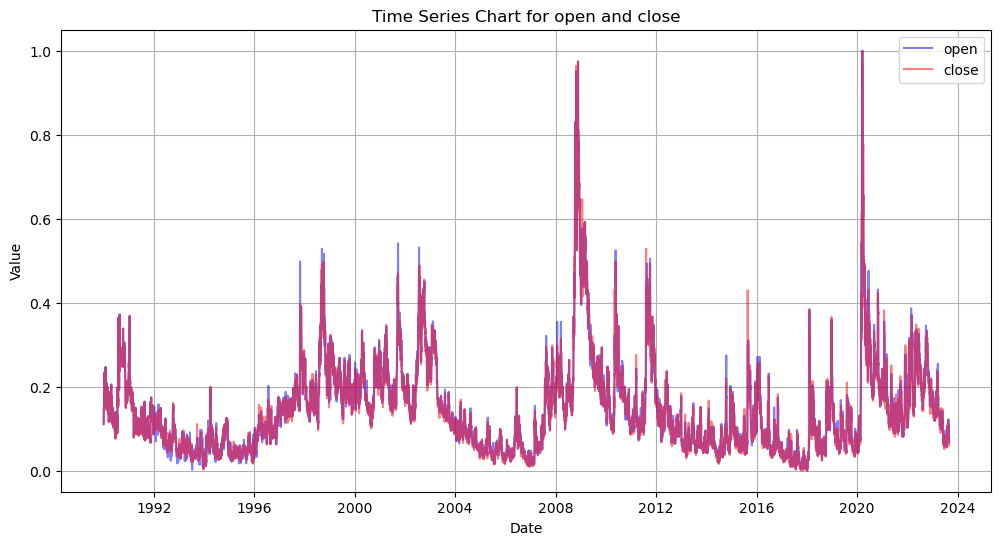

In [6]:
#time series chart for 2 variables
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 6))
# Plot Variable1 in blue
ax.plot(df.index, df['open'], label='open', color='blue', alpha=0.5)

# Plot Variable2 in red
ax.plot(df.index, df['close'], label='close', color='red', alpha=0.5)

# Label the axes and title the chart
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.set_title('Time Series Chart for open and close')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()